# Logistic Regression

In [220]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

class LogisticRegression():
    
    
    def __init__(self, num_iterations=1000, learning_rate=0.01):
        """
        Initialize the parameters of LR model
        
        Arguments:
        num_iterations -- number of iterations of the optimization loop
        learning_rate -- learning rate of the gradient descent update rule
        
        """
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        
        return None
    
    
    def sigmoid(self, x):
        """
        Compute the sigmoid of x

        Argument:
        x -- A scalar or numpy array of any size

        Return:
        s -- sigmoid(x)
        
        """ 
        s = 1.0 / (1+np.exp(-x))
    
        return s
    
    
    def propagate(self, X, Y):
        """
        Implement the cost function and its gradient for the propagation explained above

        Arguments:
        X -- data with the shape of [n_samples, n_features]
        Y -- true "label" vector with the shape of [n_samples, 1] 

        Returns:
        cost -- negative log-likelihood cost for logistic regression
        dw -- gradient of the loss with respect to w, thus same shape as w
        db -- gradient of the loss with respect to b, thus same shape as b
    
        """        
        m = X.shape[1]
        # Forward propagation(from x_train to cost)
        A = self.sigmoid(np.dot(X, self.w) + self.b).T
        cost = np.sum( - np.dot(np.log(A), Y) - np.dot(np.log(1-A), 1-Y)) / m
        # Backward propagation(to calculate gradient)
        dw = np.dot(A-Y, X) / m
        db = np.sum(A-Y) / m
        
        grads = {'dw':dw, 
                 'db':db}
        
        return grads, cost        

        
    def optimize(self, X, Y, print_cost=False):
        """
        This function optimizes w and b by running a gradient descent algorithm
    
        Arguments:
        X -- data with the shape of [n_samples, n_features]
        Y -- true "label" vector with the shape of [n_samples, 1]
        print_cost -- True to print the loss every 100 steps
    
        Return:
        costs -- list of all the costs computed during the optimization
    
        """        
        # Initialize the weights and bias 
        dim = X.shape[1]
        self.w = np.zeros([dim,1])
        self.b = 0
        
        # Begin to iterate
        costs = []
        for i in range(self.num_iterations):
            # Gradient and cost calculation
            grads, cost = self.propagate(X,Y)
            
            # Retrive derivatives from grads
            dw = grads['dw']
            db = grads['db']
            
            # Update rule
            self.w = self.w - self.learning_rate * dw.T
            self.b = self.b - self.learning_rate * db
            
            # Record the costs
            if i%100 == 0:
                costs.append(cost)
            # Print the cost every 100 iterations
            if print_cost and i%100 == 0:
                print('Cost after iteration %i: %f' %(i, cost))
                
        return costs
    
    
    def predict(self, X):
        """
        Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
        Argument:
        X -- data with the shape of [n_samples, n_features]
    
        Return:
        Y_predictions -- a numpy array (vector) containing all predictions (0/1) for the examples in X
        
        """
        # Compute vector "A"  that are the values of activation functions of wx+b
        A = self.sigmoid(np.dot(x, self.w) + b)
        Y_predictions = []
        for i in range(len(A)):
            if i <= 0.5:
                Y_predictions.append(0)
            else:
                Y_predictions.append(1)
        
        return np.array(Y_predictions)
    
    
    def fit(self, X_train, Y_train, print_cost=True, draw_costs_curve=True):
        """
        Fit the training dataset and print costs
        
        Arguments:
        X -- data with the shape of [n_samples, n_features]
        Y -- true "label" vector with the shape of [n_samples, 1]
        print_cost -- True to print the loss every 100 steps
        draw_costs_curve -- True to draw the loos every 100 steps
        
        """
        # Training the data with gradient descent
        costs = self.optimize(X_train, Y_train, print_cost)
        # Whether need to draa the loss curve
        if draw_costs_curve == True:
            plt.plot(costs)
            plt.ylabel('loss')
            plt.xlabel('unit per 100 iterations')
            plt.title('Loss trend of training data')
            
        return None
        

### Test

#### generate artificial samples

In [221]:
x = np.array([[3,3], [4,3], [1,2.5], [0.5,0.5], [2,2], [1,5], [2.5,1.5], [3.5,2.5], [1.5,3], [1.5,2], 
              [1.0,4.5], [2,4.5], [3,4.5],[0.7,3.7], [3,2]])
y = np.array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,0, 0 ])

#### training model

Cost after iteration 0: 5.198604
Cost after iteration 100: 4.367972
Cost after iteration 200: 3.869417
Cost after iteration 300: 3.492459
Cost after iteration 400: 3.196838
Cost after iteration 500: 2.957697
Cost after iteration 600: 2.759349
Cost after iteration 700: 2.591529
Cost after iteration 800: 2.447254
Cost after iteration 900: 2.321591
Cost after iteration 1000: 2.210946
Cost after iteration 1100: 2.112626
Cost after iteration 1200: 2.024567
Cost after iteration 1300: 1.945155
Cost after iteration 1400: 1.873108
Cost after iteration 1500: 1.807392
Cost after iteration 1600: 1.747162
Cost after iteration 1700: 1.691720
Cost after iteration 1800: 1.640487
Cost after iteration 1900: 1.592973
Cost after iteration 2000: 1.548764
Cost after iteration 2100: 1.507506
Cost after iteration 2200: 1.468895
Cost after iteration 2300: 1.432669
Cost after iteration 2400: 1.398600
Cost after iteration 2500: 1.366487
Cost after iteration 2600: 1.336157
Cost after iteration 2700: 1.307454
Cost

Cost after iteration 24800: 0.298732
Cost after iteration 24900: 0.297804
Cost after iteration 25000: 0.296882
Cost after iteration 25100: 0.295967
Cost after iteration 25200: 0.295057
Cost after iteration 25300: 0.294153
Cost after iteration 25400: 0.293255
Cost after iteration 25500: 0.292362
Cost after iteration 25600: 0.291476
Cost after iteration 25700: 0.290595
Cost after iteration 25800: 0.289719
Cost after iteration 25900: 0.288849
Cost after iteration 26000: 0.287985
Cost after iteration 26100: 0.287126
Cost after iteration 26200: 0.286272
Cost after iteration 26300: 0.285424
Cost after iteration 26400: 0.284580
Cost after iteration 26500: 0.283742
Cost after iteration 26600: 0.282910
Cost after iteration 26700: 0.282082
Cost after iteration 26800: 0.281260
Cost after iteration 26900: 0.280442
Cost after iteration 27000: 0.279629
Cost after iteration 27100: 0.278822
Cost after iteration 27200: 0.278019
Cost after iteration 27300: 0.277221
Cost after iteration 27400: 0.276428
C

Cost after iteration 47400: 0.176986
Cost after iteration 47500: 0.176672
Cost after iteration 47600: 0.176359
Cost after iteration 47700: 0.176048
Cost after iteration 47800: 0.175737
Cost after iteration 47900: 0.175428
Cost after iteration 48000: 0.175120
Cost after iteration 48100: 0.174812
Cost after iteration 48200: 0.174506
Cost after iteration 48300: 0.174201
Cost after iteration 48400: 0.173898
Cost after iteration 48500: 0.173595
Cost after iteration 48600: 0.173293
Cost after iteration 48700: 0.172993
Cost after iteration 48800: 0.172693
Cost after iteration 48900: 0.172395
Cost after iteration 49000: 0.172097
Cost after iteration 49100: 0.171801
Cost after iteration 49200: 0.171505
Cost after iteration 49300: 0.171211
Cost after iteration 49400: 0.170918
Cost after iteration 49500: 0.170626
Cost after iteration 49600: 0.170334
Cost after iteration 49700: 0.170044
Cost after iteration 49800: 0.169755
Cost after iteration 49900: 0.169467
Cost after iteration 50000: 0.169180
C

Cost after iteration 72400: 0.122852
Cost after iteration 72500: 0.122703
Cost after iteration 72600: 0.122554
Cost after iteration 72700: 0.122405
Cost after iteration 72800: 0.122257
Cost after iteration 72900: 0.122110
Cost after iteration 73000: 0.121962
Cost after iteration 73100: 0.121815
Cost after iteration 73200: 0.121668
Cost after iteration 73300: 0.121522
Cost after iteration 73400: 0.121376
Cost after iteration 73500: 0.121231
Cost after iteration 73600: 0.121085
Cost after iteration 73700: 0.120940
Cost after iteration 73800: 0.120796
Cost after iteration 73900: 0.120652
Cost after iteration 74000: 0.120508
Cost after iteration 74100: 0.120364
Cost after iteration 74200: 0.120221
Cost after iteration 74300: 0.120078
Cost after iteration 74400: 0.119936
Cost after iteration 74500: 0.119794
Cost after iteration 74600: 0.119652
Cost after iteration 74700: 0.119510
Cost after iteration 74800: 0.119369
Cost after iteration 74900: 0.119229
Cost after iteration 75000: 0.119088
C

Cost after iteration 98300: 0.093512
Cost after iteration 98400: 0.093426
Cost after iteration 98500: 0.093341
Cost after iteration 98600: 0.093255
Cost after iteration 98700: 0.093170
Cost after iteration 98800: 0.093084
Cost after iteration 98900: 0.092999
Cost after iteration 99000: 0.092914
Cost after iteration 99100: 0.092830
Cost after iteration 99200: 0.092745
Cost after iteration 99300: 0.092661
Cost after iteration 99400: 0.092576
Cost after iteration 99500: 0.092492
Cost after iteration 99600: 0.092408
Cost after iteration 99700: 0.092324
Cost after iteration 99800: 0.092241
Cost after iteration 99900: 0.092157


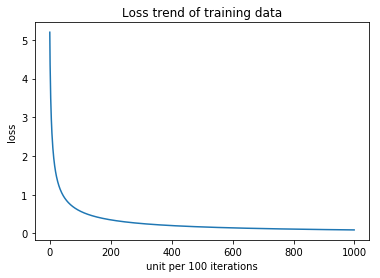

In [218]:
model = LogisticRegression(num_iterations=100000)
model.fit(x,y)

#### Visualization

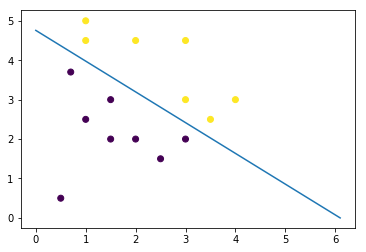

In [219]:
# 计算超平面与坐标轴的交点
x1_1 = - model.b / model.w[0]
x2_1 = - model.b / model.w[1]
# 可视化超平面与训练数据的关系
fig_1 = plt.scatter(x[:,0], x[:,1], c=y)
fig_1 = plt.plot([0,x1_1], [x2_1,0])